In [1]:
#import basic libaries 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
import sklearn
import string
import re
import emoji




In [2]:
#import nltk libaries
nltk.download('stopwords')
nltk.download('punkt')
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))
from wordcloud import WordCloud

[nltk_data] Downloading package stopwords to C:\Users\Elliott
[nltk_data]     Lam\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to C:\Users\Elliott
[nltk_data]     Lam\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [3]:
#loading test csv
df = pd.read_csv('translation test.csv')

In [4]:
df.head()

,Unnamed: 0.1,Unnamed: 0,descriptions,titles,view_counts,channel_ids,publish_dates,tags,thumbnails,translated titles,translated tags,translated descriptions
0,0,0,Blockz Finance 是您獲取商業思維、加密貨幣世界重點資訊的一站式頻道 2023-...,幣圈熊市又一波？幣圈另類巨人Silvergate頂唔順 ｜又關FTX事｜廣告Rstaking,1116,UCcAyw5OwGXDMJfFx3q9U4XQ,2023-03-10T15:51:27Z,"['投資', '致富', '賺錢', '有錢人', '區塊鏈', '比特幣', 'bitco...",{'url': 'https://i.ytimg.com/vi/SrrUfSnxA-k/de...,There is another wave of bear markets in the c...,"['Investment', 'to get rich', 'make money', 'r...",Blockz Finance is a one-stop channel for your ...
1,1,1,Blockz Finance 是您獲取商業思維、加密貨幣世界重點資訊的一站式頻道 2023-...,"幣圈熊市罪魁禍首 - 佢令到Bitcoin跌了50,000美金",1228,UCcAyw5OwGXDMJfFx3q9U4XQ,2023-03-01T04:13:54Z,"['投資', '致富', '賺錢', '有錢人', '區塊鏈', '比特幣', 'bitco...",{'url': 'https://i.ytimg.com/vi/50pyDCuaLM8/de...,The culprit in the currency circle -has ordere...,"['Investment', 'to get rich', 'make money', 'r...",Blockz Finance is a one-stop channel for your ...
2,2,2,Blockz Finance 是您獲取商業思維、加密貨幣世界重點資訊的一站式頻道 2023-...,FTX前員工大爆料: 超誇張福利｜SBF被野生捕獲｜FTX無經驗都可以做高層｜用不完的錢,672,UCcAyw5OwGXDMJfFx3q9U4XQ,2023-01-18T04:00:16Z,"['投資', '致富', '賺錢', '有錢人', '區塊鏈', '比特幣', 'bitco...",{'url': 'https://i.ytimg.com/vi/oDj_nSJGNNs/de...,Pre -FTX employee broke the news: Super exagge...,"['Investment', 'to get rich', 'make money', 'r...",Blockz Finance is a one-stop channel for your ...
3,3,3,Blockz Finance 是您獲取商業思維、加密貨幣世界重點資訊的一站式頻道 2023-...,[Airbnb] 連續12年蝕錢，上市市值即過千億｜全世界最大的房地產公司｜「共享經濟」市場...,1064,UCcAyw5OwGXDMJfFx3q9U4XQ,2023-01-14T06:00:08Z,"['投資', '致富', '賺錢', '有錢人', '區塊鏈', '比特幣', 'bitco...",{'url': 'https://i.ytimg.com/vi/SQMY0NnmEuk/de...,[Airbnb] Extracting money for 12 consecutive y...,"['Investment', 'to get rich', 'make money', 'r...",Blockz Finance is a one-stop channel for your ...
4,4,4,Blockz Finance 是您獲取商業思維、加密貨幣世界重點資訊的一站式頻道 2023-...,[Celsius破產] 手法比FTX更高章｜客戶既錢就係我既錢 ｜魔鬼就在細節中,796,UCcAyw5OwGXDMJfFx3q9U4XQ,2023-01-11T11:30:06Z,"['投資', '致富', '賺錢', '有錢人', '區塊鏈', '比特幣', 'bitco...",{'url': 'https://i.ytimg.com/vi/O-OeytUFyhY/de...,[Celsius bankruptcy] Higher chapter than FTX ｜...,"['Investment', 'to get rich', 'make money', 'r...",Blockz Finance is a one-stop channel for your ...


In [5]:
#creating a text cleaning function

#old text cleaning function
# def text_cleaning(text):
#     text = text.lower()
    
#     text = text.translate(str.maketrans('', '', string.punctuation))
    
#     text_tokens = word_tokenize(text)
#     filtered_text = [w for w in text_tokens if not w in stop_words]
#     return " ".join(filtered_text)



#most recent text cleaning function
def text_cleaning(text):
    # Convert text to lowercase
    text = text.lower()
    
    # Remove emojis
    text = emoji.demojize(text)
    
    # Remove special characters and punctuation
    text = re.sub(r'[^a-zA-Z0-9\s]', '', text)
    
    # Tokenize the text
    text_tokens = word_tokenize(text)
    
    # Remove stop words
    stop_words = set(stopwords.words('english'))
    filtered_text = [w for w in text_tokens if not w in stop_words]
    
    # Join the filtered tokens into a single string
    cleaned_text = " ".join(filtered_text)
    
    return cleaned_text

In [6]:
#testing on translated tags only
df2 = df['translated tags'] = df['translated tags'].apply(text_cleaning)

In [9]:
#df2.head and saving cleaned test file
df2.to_csv('cleaned_translated_tags.csv')
df2.head()


0    investment get rich make money rich people blo...
1    investment get rich make money rich people blo...
2    investment get rich make money rich people blo...
3    investment get rich make money rich people blo...
4    investment get rich make money rich people blo...
Name: translated tags, dtype: object

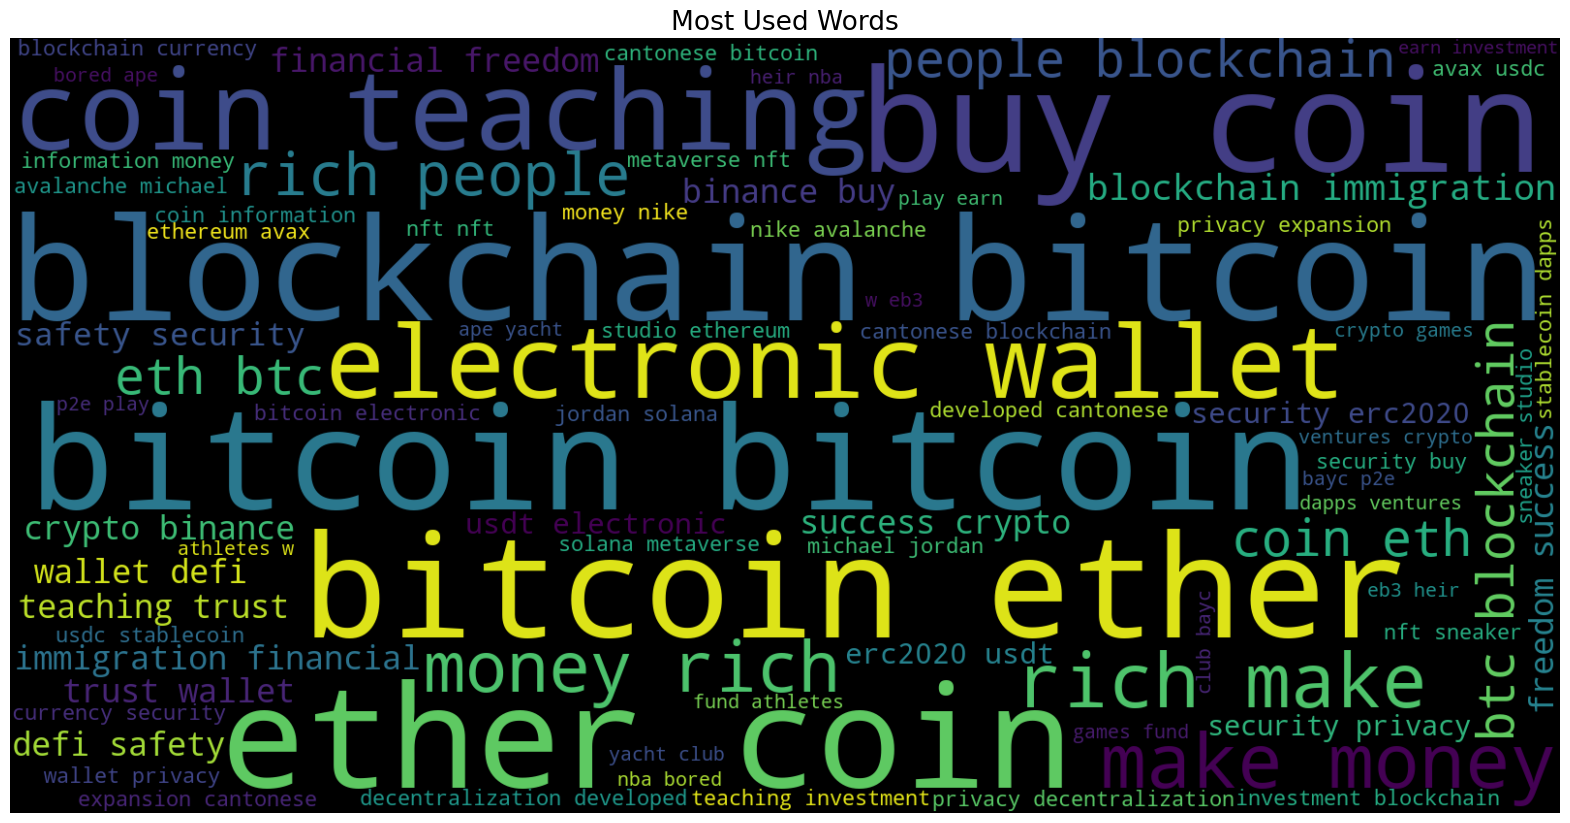

In [10]:
#visualize the most used words by using word cloud
text = ' '.join(df2)
plt.figure(figsize = (20,15), facecolor = 'none')
wordcloud = WordCloud(max_words = 500, width = 1600, height = 800).generate(text)
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.title('Most Used Words', fontsize = 19)

plt.show()

In [11]:
#create a word count function
def no_of_words(text):
  words = text.split()
  word_count = len(words)
  return word_count

In [12]:
df2.apply(no_of_words)

0    92
1    92
2    92
3    92
4    92
5    92
6    92
7    92
8    92
9    92
Name: translated tags, dtype: int64

In [13]:
#count number of unique words
def no_of_unique_words(text):
    words = text.split()
    unique_words = set(words)
    unique_word_count = len(unique_words)
    return unique_word_count

In [14]:
df2.apply(no_of_unique_words)

0    65
1    65
2    65
3    65
4    65
5    65
6    65
7    65
8    65
9    65
Name: translated tags, dtype: int64

In [19]:
#function to get number of unique words
def get_unique_words(text):
    words = text.split()
    unique_words = list(words)
    return unique_words


In [20]:
#apply
unique = df2.apply(get_unique_words)
unique.to_csv('unique.csv')

In [21]:
unique

0    [investment, get, rich, make, money, rich, peo...
1    [investment, get, rich, make, money, rich, peo...
2    [investment, get, rich, make, money, rich, peo...
3    [investment, get, rich, make, money, rich, peo...
4    [investment, get, rich, make, money, rich, peo...
5    [investment, get, rich, make, money, rich, peo...
6    [investment, get, rich, make, money, rich, peo...
7    [investment, get, rich, make, money, rich, peo...
8    [investment, get, rich, make, money, rich, peo...
9    [investment, get, rich, make, money, rich, peo...
Name: translated tags, dtype: object

In [22]:
#expanding test to all translated data
#join all translated text

translated_text = ' '.join(df['translated titles']) + ' ' + ' '.join(df['translated tags']) + ' ' + ' '.join(df['translated descriptions'])
translated_text

'There is another wave of bear markets in the currency circle?The currency circle alternative giant Silvergate top 唔 ｜ ｜ ｜ ｜ ｜ You also close FTX ｜ Advertising RSTAKING The culprit in the currency circle -has ordered Bitcoin to fall 50,000 US dollars Pre -FTX employee broke the news: Super exaggerated benefits ｜ SBF is captured by wild ｜ FTX can do high -level high -level ｜ Endless money [Airbnb] Extracting money for 12 consecutive years, the market value of the listing is over 100 billion ｜ How does the leading platform in the "shared economy" market in the world\'s largest real estate company be born? [Celsius bankruptcy] Higher chapter than FTX ｜ Customer money is my money ｜ The devil is in the details [DCG Empire collapse] 600,000 pieces of bitcoin flow into the market?Cross Terra Luna FTX?Gray GeNESIS Destiny? ｜ The final nuclear bomb [Web3 one minute] EP3: The point solution will appear web3? [The world is the SCAM series] Binance Binance is squeezed?IntersectionWill there be dea

In [23]:
#apply text cleaning function
text_cleaning(translated_text)

'another wave bear markets currency circlethe currency circle alternative giant silvergate top also close ftx advertising rstaking culprit currency circle ordered bitcoin fall 50000 us dollars pre ftx employee broke news super exaggerated benefits sbf captured wild ftx high level high level endless money airbnb extracting money 12 consecutive years market value listing 100 billion leading platform shared economy market worlds largest real estate company born celsius bankruptcy higher chapter ftx customer money money devil details dcg empire collapse 600000 pieces bitcoin flow marketcross terra luna ftxgray genesis destiny final nuclear bomb web3 one minute ep3 point solution appear web3 world scam series binance binance squeezedintersectionwill death spiral six gate factions siege guangmingding web3 one minute ep2 government localities web30 christmas liberation ftx incident past present life sbf tiansuo entered fan arraythe latest dynamic point event investment get rich make money ric